In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

C:\Users\yajin\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\yajin\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\yajin\anaconda3\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\yajin\anaconda3\envs\PythonData\lib\site-packages

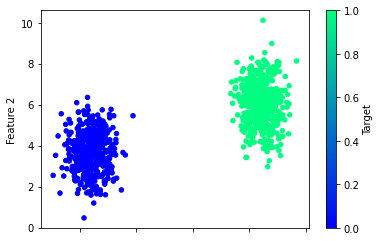

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
750/750 [==============================] - 0s 186us/sample - loss: 0.8382 - acc: 0.0187
Epoch 2/100
750/750 [==============================] - 0s 20us/sample - loss: 0.8183 - acc: 0.0000e+00
Epoch 3/100
750/750 [==============================] - 0s 21us/sample - loss: 0.8007 - acc: 0.0000e+00
Epoch 4/100
750/750 [==============================] - 0s 21us/sample - loss: 0.7852 - acc: 0.0000e+00
Epoch 5/100
750/750 [==============================] - 0s 21us/sample - loss: 0.7715 - acc: 0.0027
Epoch 6/100
750/750 [==============================] - 0s 21us/sample - loss: 0.7587 - acc: 0.0040
Epoch 7/100
750/750 [==============================] - 0s 21us/sample - loss: 0.7475 - acc: 0.0040
Epoch 8/100
750/750 [==============================] - 0s 21us/sample - loss: 0.7372 - acc: 0.0053
Epoch 9/100
750/750 [==============================] - 0s 21us/sample - loss: 0.7278 - acc: 0.0053
Epoch 10/100
750/750 [==============================] - 0s 21us/sample - loss: 0.7191 - acc: 0.0

750/750 [==============================] - 0s 23us/sample - loss: 0.1389 - acc: 1.0000
Epoch 83/100
750/750 [==============================] - 0s 24us/sample - loss: 0.1363 - acc: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 23us/sample - loss: 0.1337 - acc: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 23us/sample - loss: 0.1312 - acc: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 23us/sample - loss: 0.1287 - acc: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 23us/sample - loss: 0.1264 - acc: 1.0000
Epoch 88/100
750/750 [==============================] - 0s 24us/sample - loss: 0.1240 - acc: 1.0000
Epoch 89/100
750/750 [==============================] - 0s 23us/sample - loss: 0.1218 - acc: 1.0000
Epoch 90/100
750/750 [==============================] - 0s 23us/sample - loss: 0.1196 - acc: 1.0000
Epoch 91/100
750/750 [==============================] - 0s 21us/sample - loss: 0.1174 - acc: 1.0000
Epoch 92/100


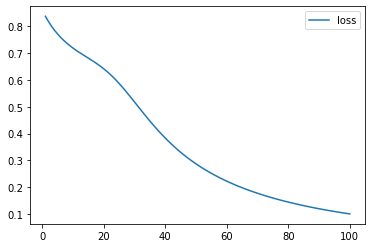

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

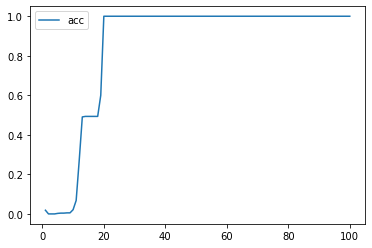

In [12]:
# Plot the accuracy
# Plot the accuracy
history_df.plot(y="acc")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/250 - 0s - loss: 0.0935 - acc: 1.0000
Loss: 0.0934706734418869, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

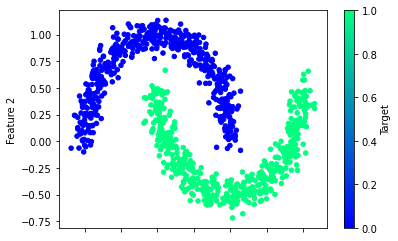

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 24us/sample - loss: 1.0694 - acc: 0.4387
Epoch 2/100
750/750 [==============================] - 0s 23us/sample - loss: 0.9766 - acc: 0.4547
Epoch 3/100
750/750 [==============================] - 0s 21us/sample - loss: 0.9101 - acc: 0.4760
Epoch 4/100
750/750 [==============================] - 0s 23us/sample - loss: 0.8640 - acc: 0.4853
Epoch 5/100
750/750 [==============================] - 0s 23us/sample - loss: 0.8290 - acc: 0.5000
Epoch 6/100
750/750 [==============================] - 0s 21us/sample - loss: 0.8023 - acc: 0.5173
Epoch 7/100
750/750 [==============================] - 0s 21us/sample - loss: 0.7803 - acc: 0.5280
Epoch 8/100
750/750 [==============================] - 0s 23us/sample - loss: 0.7629 - acc: 0.5400
Epoch 9/100
750/750 [==============================] - 0s 29us/sample - loss: 0.7480 - acc: 0.5493
Epoch 10/100
750/750 [==============================] - 0s 23us/sample - loss: 0.7348 - acc: 0.5573
Epoch 11/

750/750 [==============================] - 0s 21us/sample - loss: 0.4832 - acc: 0.7387
Epoch 84/100
750/750 [==============================] - 0s 21us/sample - loss: 0.4812 - acc: 0.7413
Epoch 85/100
750/750 [==============================] - 0s 21us/sample - loss: 0.4793 - acc: 0.7440
Epoch 86/100
750/750 [==============================] - 0s 23us/sample - loss: 0.4772 - acc: 0.7467
Epoch 87/100
750/750 [==============================] - 0s 25us/sample - loss: 0.4753 - acc: 0.7467
Epoch 88/100
750/750 [==============================] - 0s 28us/sample - loss: 0.4732 - acc: 0.7493
Epoch 89/100
750/750 [==============================] - 0s 28us/sample - loss: 0.4712 - acc: 0.7493
Epoch 90/100
750/750 [==============================] - 0s 25us/sample - loss: 0.4690 - acc: 0.7533
Epoch 91/100
750/750 [==============================] - 0s 27us/sample - loss: 0.4670 - acc: 0.7533
Epoch 92/100
750/750 [==============================] - 0s 35us/sample - loss: 0.4649 - acc: 0.7547
Epoch 93/100


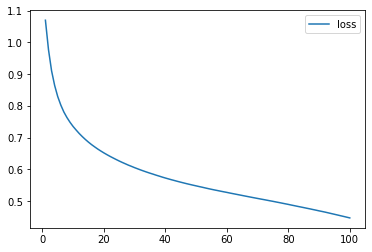

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

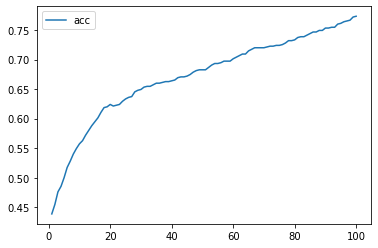

In [19]:
# Plot the loss
history_df.plot(y="acc")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
750/750 [==============================] - 0s 128us/sample - loss: 0.7789 - acc: 0.2960
Epoch 2/100
750/750 [==============================] - 0s 27us/sample - loss: 0.7442 - acc: 0.3693
Epoch 3/100
750/750 [==============================] - 0s 31us/sample - loss: 0.7135 - acc: 0.4573
Epoch 4/100
750/750 [==============================] - 0s 32us/sample - loss: 0.6862 - acc: 0.5080
Epoch 5/100
750/750 [==============================] - 0s 33us/sample - loss: 0.6609 - acc: 0.5520
Epoch 6/100
750/750 [==============================] - 0s 31us/sample - loss: 0.6364 - acc: 0.5733
Epoch 7/100
750/750 [==============================] - 0s 32us/sample - loss: 0.6118 - acc: 0.6120
Epoch 8/100
750/750 [==============================] - 0s 26us/sample - loss: 0.5870 - acc: 0.6907
Epoch 9/100
750/750 [==============================] - 0s 31us/sample - loss: 0.5619 - acc: 0.8107
Epoch 10/100
750/750 [==============================] - 0s 33us/sample - loss: 0.5360 - acc: 0.8493
Epoch 11

750/750 [==============================] - 0s 31us/sample - loss: 0.2201 - acc: 0.9107
Epoch 84/100
750/750 [==============================] - 0s 33us/sample - loss: 0.2191 - acc: 0.9120
Epoch 85/100
750/750 [==============================] - 0s 35us/sample - loss: 0.2182 - acc: 0.9133
Epoch 86/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2173 - acc: 0.9147
Epoch 87/100
750/750 [==============================] - 0s 29us/sample - loss: 0.2162 - acc: 0.9160
Epoch 88/100
750/750 [==============================] - 0s 28us/sample - loss: 0.2153 - acc: 0.9160
Epoch 89/100
750/750 [==============================] - 0s 33us/sample - loss: 0.2142 - acc: 0.9160
Epoch 90/100
750/750 [==============================] - 0s 28us/sample - loss: 0.2132 - acc: 0.9160
Epoch 91/100
750/750 [==============================] - 0s 33us/sample - loss: 0.2122 - acc: 0.9160
Epoch 92/100
750/750 [==============================] - 0s 34us/sample - loss: 0.2113 - acc: 0.9173
Epoch 93/100
